In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',1000)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# UNDERSTANDING THE **DATASET**

In [3]:
#reading the data file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 2/Regression_Insurance_Data.csv')
df.head(5)

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [4]:
df_c = df.copy()
df.shape

(1338, 8)

In [5]:
df.isnull().sum()
#no null values

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
mod = df['classif'].mode()[0]
df['classif'].fillna(mod,inplace=True)

# OUTLIER ANALYSIS ON TARGET COLUMN

In [7]:
df.describe()
#seems like target column has outliers 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [8]:
q1 = 4740.287150
q2 = 9382.033000
q3 = 16639.912515
IQR = q3-q1
outlier_count = df[df.charges > (q3 + 1.5*IQR)].count()
print(q3 + 1.5*IQR)
outlier_count
#139 rows to be dropped

34489.350562499996


age         139
sex         139
bmi         139
classif     139
children    139
smoker      139
region      139
charges     139
dtype: int64

In [9]:
(q3-q2) < (q2-q1) #right skewed data

False

In [10]:
#checking outliers for target column
import plotly.express as px
fig = px.box(df, y="charges")
fig.show()

In [11]:
df[df['charges'] >= 40000].count()
#we will go with 40000 as the threshold value

age         79
sex         79
bmi         79
classif     79
children    79
smoker      79
region      79
charges     79
dtype: int64

In [12]:
data = df[df['charges'] <= 40000]
data.shape

(1259, 8)

# DATA VISUALS

In [13]:
data_v = data.copy()

In [14]:
data_v.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


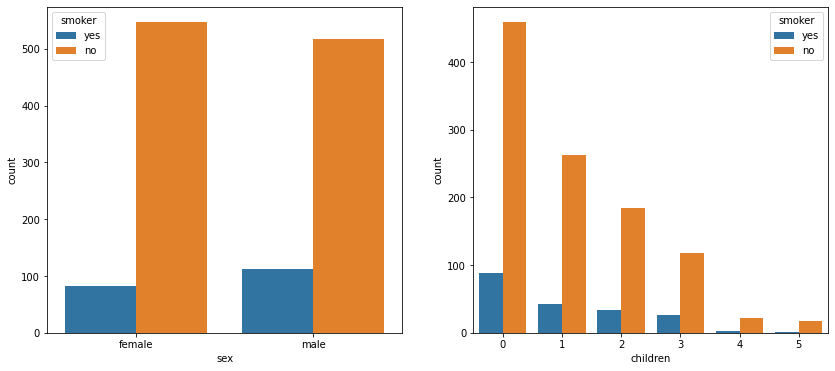

In [15]:
fig,axes = plt.subplots(1,2,figsize=(14,6))
sns.countplot(x = data_v['sex'] , hue  = data_v['smoker'],ax=axes[0])
sns.countplot(x = data_v['children'] , hue  = data_v['smoker'],ax=axes[1])

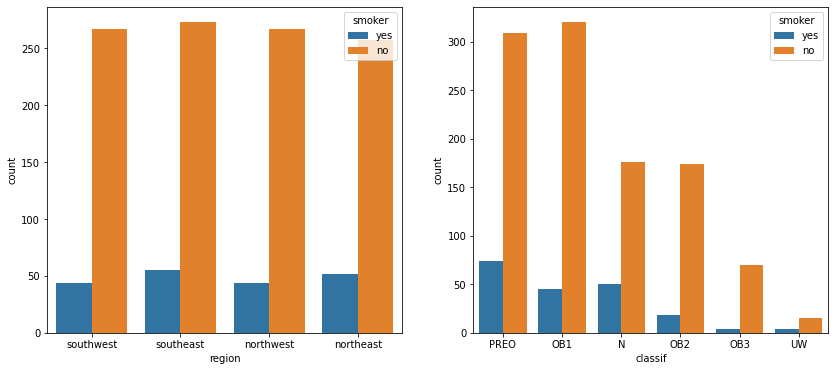

In [16]:
fig,axes = plt.subplots(1,2,figsize=(14,6))
sns.countplot(x = data_v['region'] , hue  = data_v['smoker'],ax=axes[0])
sns.countplot(x = data_v['classif'] , hue  = data_v['smoker'],ax=axes[1])

In [17]:
data_v.loc[data_v.bmi > 25.0,'Obesity_status'] = 'Yes'

In [18]:
data_v['Obesity_status'].fillna('No',inplace=True)
data_v.head()

,age,sex,bmi,classif,children,smoker,region,charges,Obesity_status
0,19,female,27.900,PREO,0,yes,southwest,16884.92400,Yes
1,18,male,33.770,OB1,1,no,southeast,1725.55230,Yes
2,28,male,33.000,OB1,3,no,southeast,4449.46200,Yes
3,0,male,22.705,N,0,no,northwest,21984.47061,No
4,32,male,28.880,PREO,0,no,northwest,3866.85520,Yes


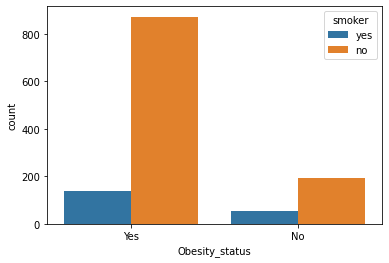

In [19]:
sns.countplot(x = data_v['Obesity_status'] , hue  = data_v['smoker'])

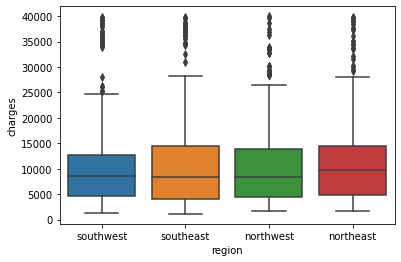

In [20]:
sns.boxplot(y=data_v['charges'],x=data_v['region'])

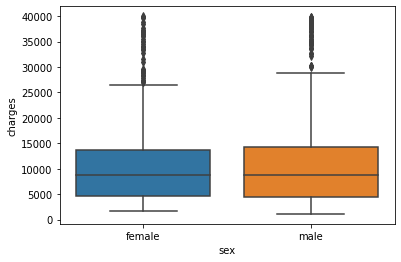

In [21]:
sns.boxplot(y=data_v['charges'],x=data_v['sex'])

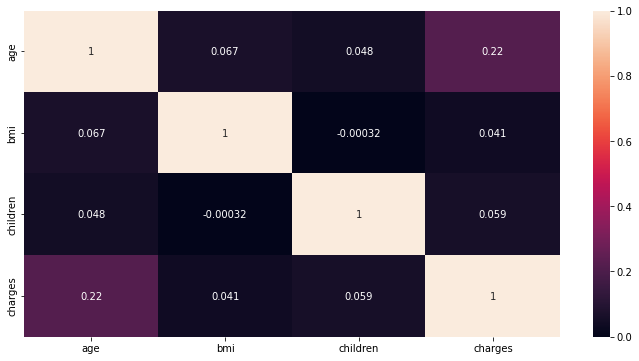

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

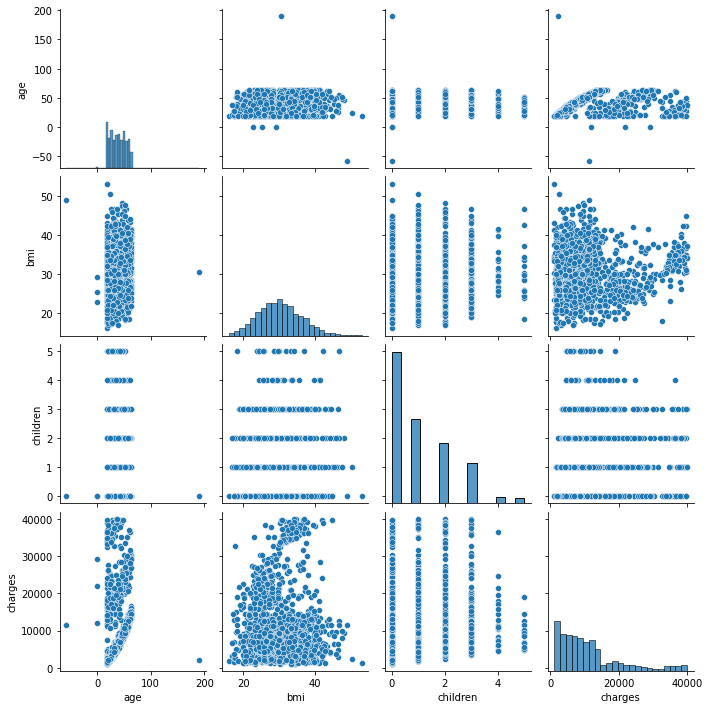

In [23]:
sns.pairplot(data_v)

In [24]:
data.isnull().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

# ENCODING, NORMALIZATION AND SPLITTING THE DATA

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1259 non-null   int64  
 1   sex       1259 non-null   object 
 2   bmi       1259 non-null   float64
 3   classif   1259 non-null   object 
 4   children  1259 non-null   int64  
 5   smoker    1259 non-null   object 
 6   region    1259 non-null   object 
 7   charges   1259 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 120.8+ KB


In [26]:
data.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = list(data.select_dtypes(include='object'))
for i in col:
  data[i] = le.fit_transform(data[i])
data.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.900,4,0,1,3,16884.92400
1,18,1,33.770,1,1,0,2,1725.55230
2,28,1,33.000,1,3,0,2,4449.46200
3,0,1,22.705,0,0,0,1,21984.47061
4,32,1,28.880,4,0,0,1,3866.85520


In [28]:
data_c = data.copy()

In [29]:
data.drop(columns='charges',inplace=True)

In [30]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
data = pd.DataFrame(sca.fit_transform(data),columns=data.columns)

In [31]:
data.head()

,age,sex,bmi,classif,children,smoker,region
0,0.310484,0.0,0.321227,0.8,0.0,1.0,1.000000
1,0.306452,1.0,0.479150,0.2,0.2,0.0,0.666667
2,0.346774,1.0,0.458434,0.2,0.6,0.0,0.666667
3,0.233871,1.0,0.181464,0.0,0.0,0.0,0.333333
4,0.362903,1.0,0.347592,0.8,0.0,0.0,0.333333


In [32]:
from sklearn.model_selection import train_test_split
x = data
y = data_c.charges
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **REGRESSION ANALYSIS USING VARIOUS MODELS**

LINEAR REGRESSION

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold,cross_val_score
#-------------------------------------------------------------------------------
lr = LinearRegression()
model1 = lr.fit(x_train,y_train)
r21 = lr.score(x_train,y_train)
y_pred1 = lr.predict(x_test)
mse1 = mean_squared_error(y_test,y_pred1)
mae1 = mean_absolute_error(y_test,y_pred1)
rmse1 = mean_squared_error(y_test,y_pred1,squared=False)
#-------------------------------------------------------------------------------
kf = KFold(n_splits=5)
cv1 = cross_val_score(model1,x,y,cv=kf,scoring='r2').mean()
a1 = cross_val_score(model1,x,y,cv=kf,scoring='r2')

DECISION TREE REGRESSION

In [34]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5,random_state=42)
model2 = dtr.fit(x_train,y_train)
r22 = dtr.score(x_train,y_train)
y_pred2 = dtr.predict(x_test)
mse2 = mean_squared_error(y_test,y_pred2)
mae2 = mean_absolute_error(y_test,y_pred2)
rmse2 = mean_squared_error(y_test,y_pred2,squared=False)
cv2 = cross_val_score(model2,x,y,cv=kf,scoring='r2').mean()
a2 = cross_val_score(model2,x,y,cv=kf,scoring='r2')

RANDOM FOREST REGRESSOR - BAGGING

In [35]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=4,n_estimators=10,oob_score=True,random_state=42)
model3 = rfr.fit(x_train,y_train)
r23 = rfr.score(x_train,y_train)
y_pred3 = rfr.predict(x_test)
mse3 = mean_squared_error(y_test,y_pred3)
mae3 = mean_absolute_error(y_test,y_pred3)
rmse3 = mean_squared_error(y_test,y_pred3,squared=False)
cv3 = cross_val_score(model3,x,y,cv=kf,scoring='r2').mean()
a3 = cross_val_score(model3,x,y,cv=kf,scoring='r2')


ADABOOST REGRESSOR - BOOSTING

In [36]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(random_state=42)
model4 = abr.fit(x_train,y_train)
r24 = abr.score(x_train,y_train)
y_pred4 = abr.predict(x_test)
mse4 = mean_squared_error(y_test,y_pred4)
mae4 = mean_absolute_error(y_test,y_pred4)
rmse4 = mean_squared_error(y_test,y_pred4,squared=False)
cv4 = cross_val_score(model4,x,y,cv=kf,scoring='r2').mean()
a4 = cross_val_score(model4,x,y,cv=kf,scoring='r2')

KNN REGRESSOR

In [37]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=5)
model5 = knr.fit(x_train,y_train)
r25 = abr.score(x_train,y_train)
y_pred5 = abr.predict(x_test)
mse5 = mean_squared_error(y_test,y_pred5)
mae5 = mean_absolute_error(y_test,y_pred5)
rmse5 = mean_squared_error(y_test,y_pred5,squared=False)
cv5 = cross_val_score(model5,x,y,cv=kf,scoring='r2').mean()
a5 = cross_val_score(model5,x,y,cv=kf,scoring='r2')

SVR

In [38]:
from sklearn.svm import SVR

svr = SVR()
model6 = knr.fit(x_train,y_train)
r26 = abr.score(x_train,y_train)
y_pred6 = abr.predict(x_test)
mse6 = mean_squared_error(y_test,y_pred6)
mae6 = mean_absolute_error(y_test,y_pred6)
rmse6 = mean_squared_error(y_test,y_pred6,squared=False)
cv6 = cross_val_score(model5,x,y,cv=kf,scoring='r2').mean()
a6 = cross_val_score(model5,x,y,cv=kf,scoring='r2')

STACKING FOR REGRESSORS

In [39]:
from sklearn.ensemble import StackingRegressor

# base_models = [('dtr',dtr),('rfr',rfr),('abr',abr),('knr',knr),('svr',svr)]
# meta_model = lr
# sr = StackingRegressor(estimators=base_models,final_estimator=meta_model,cv=5)
# cv7 = cross_val_score(sr,x,y,cv=kf,scoring='r2').mean()
# a7 = cross_val_score(sr,x,y,cv=kf,scoring='r2')

def get_stacking():
    #base models
    base = list()
    base.append(('knr', KNeighborsRegressor()))
    base.append(('dtr', DecisionTreeRegressor()))
    base.append(('svr', SVR()))
    base.append(('rfr', RandomForestRegressor()))
    base.append(('abr', AdaBoostRegressor()))
    #meta model
    meta = LinearRegression()
    #stacking ensemble'
    sr = StackingRegressor(estimators=base,final_estimator=meta,cv=5)
    return sr
model7 = get_stacking()
cv7 = cross_val_score(model7,x,y,cv=kf,scoring='r2').mean()
a7 = cross_val_score(model7,x,y,cv=kf,scoring='r2')

In [40]:
dict1 = {'MODELS':['LR','DTR','RFR','KNR','STACKING'],'MAE':[mae1,mae2,mae3,mae5,'-'],'RMSE':[rmse1,rmse2,rmse3,rmse5,'-'],'R^2_CV_score':[cv1,cv2,cv3,cv5,cv7],'arrays':[a1,a2,a3,a5,a7]}
df1 = pd.DataFrame(dict1)
df1

,MODELS,MAE,RMSE,R^2_CV_score,arrays
0,LR,3671.3072,5312.39366,0.619475,"[0.6614917115786998, 0.5688912270992793, 0.575..."
1,DTR,2423.329242,4247.821924,0.738355,"[0.816296034119899, 0.6322767541064749, 0.7340..."
2,RFR,2405.048447,4075.680009,0.755337,"[0.8208554611857336, 0.6538100776576858, 0.765..."
3,KNR,3787.08214,4866.411729,0.613357,"[0.7078909720005198, 0.4576288688617627, 0.574..."
4,STACKING,-,-,0.743143,"[0.7987194468812061, 0.6362943427761603, 0.748..."


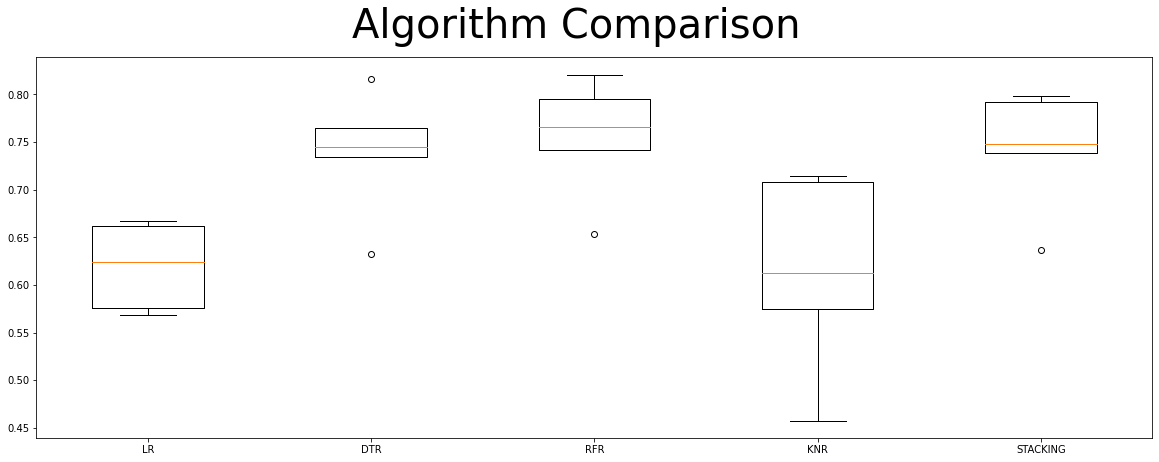

In [41]:
#model performance using box plot for comparision
fig,ax = plt.subplots(figsize = (20,7))
plt.boxplot(df1["arrays"],labels=df1['MODELS'])
fig.suptitle('Algorithm Comparison',size=40)
plt.show()

# GETTING BEST PARAMETERS FOR RFR AND PREDICTING THE TARGET COLUMN

In [42]:
from sklearn.model_selection import GridSearchCV
rf1 = RandomForestRegressor()
print(rf1.get_params())
#nestimators = no of trees in the forest
#max_depth = depth of the tree
#max_feature = feature to consider to look for the best split
#bootstrap = method of generating samples if true samples are used or else entire dataset

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [43]:
# sa = list(np.arange(1,100))
# params = {'max_depth': [10,15,20,25,30],'n_estimators': sa,'max_features':['sqrt','log2'],'bootstrap':['True','False']}
# rfr_gscv = GridSearchCV(estimator=rf1, param_grid=params, cv=kf, scoring="r2")
# rfr_gscv.fit(x_train,y_train)
# print(rfr_gscv.best_params_)
# print(rfr_gscv.best_score_)

In [44]:
#building the best model for predicting target column

rfr_ideal = RandomForestRegressor(max_depth=10,n_estimators=80,bootstrap=False,max_features='log2')
ideal_model = rfr_ideal.fit(x_train,y_train)
r2i = rfr_ideal.score(x_train,y_train)
test_pred = rfr_ideal.predict(x_test)
train_pred = rfr_ideal.predict(x_train)

In [45]:
#model comparision before and after hyperparameter tuning
dict2 = {'MODEL':['RFR','RFR-tuned'],'R^2 Score':[r23,r2i]}
df2 = pd.DataFrame(dict2)
df2

,MODEL,R^2 Score
0,RFR,0.767521
1,RFR-tuned,0.942562


In [46]:
#feature importance 
df3 = pd.DataFrame({'column_name':x.columns,'column_importance':ideal_model.feature_importances_})
df3.sort_values(by='column_importance',ascending=False)

,column_name,column_importance
5,smoker,0.568788
0,age,0.184165
2,bmi,0.136204
3,classif,0.044761
4,children,0.030796
6,region,0.024572
1,sex,0.010715


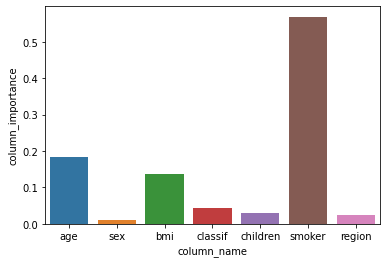

In [47]:
sns.barplot(x=df3['column_name'],y=df3['column_importance'])

In [48]:
#final dataframe with predicted values
one = pd.DataFrame(data=train_pred,index=y_train.index)
two = pd.DataFrame(data=test_pred,index=y_test.index)
three = pd.concat([one,two])
three.sort_index(ascending=True).head()

,0
0,16949.038784
1,3520.376870
2,5533.739526
3,19674.810171
4,4130.707783


In [49]:
df_c['Predicted_Charges'] = pd.DataFrame(three)
df_c.head()

,age,sex,bmi,classif,children,smoker,region,charges,Predicted_Charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400,16949.038784
1,18,male,33.770,OB1,1,no,southeast,1725.55230,3520.376870
2,28,male,33.000,OB1,3,no,southeast,4449.46200,5533.739526
3,0,male,22.705,N,0,no,northwest,21984.47061,19674.810171
4,32,male,28.880,PREO,0,no,northwest,3866.85520,4130.707783


In [50]:
df_c.to_csv('Regression_Insurance_Data.csv')

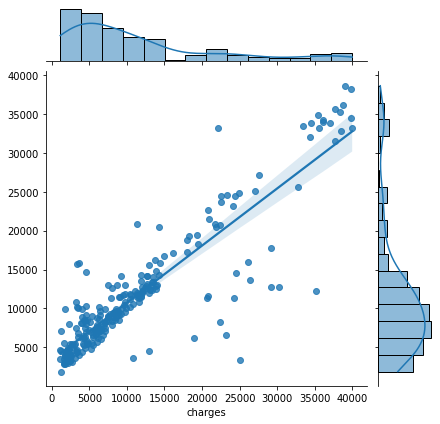

In [51]:
sns.jointplot(y_test,test_pred,kind='reg')

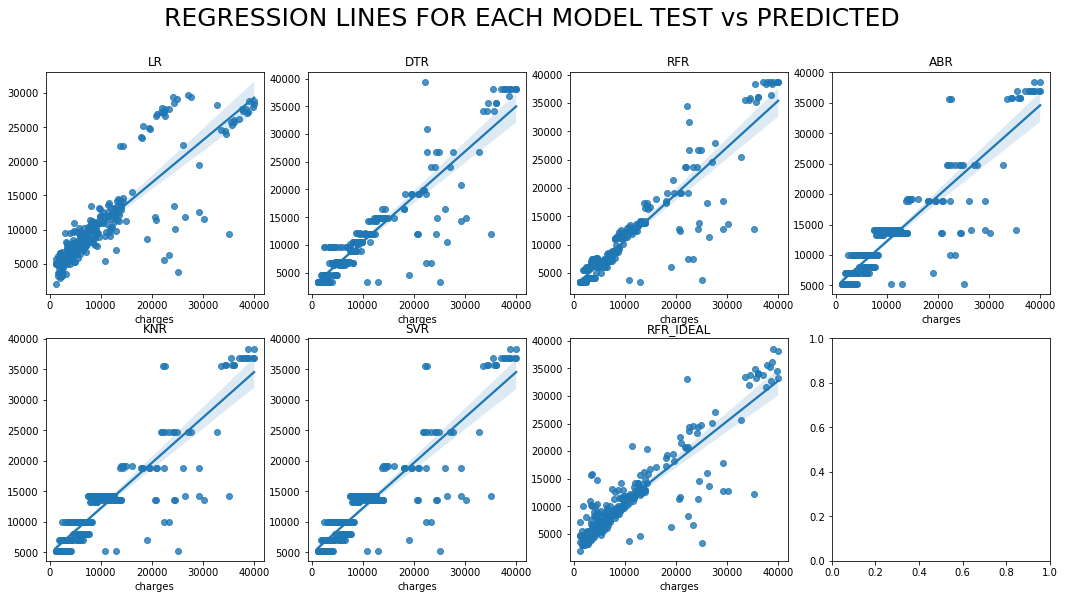

In [52]:
subtitle = ['LR','DTR','RFR','ABR','KNR','SVR','RFR_IDEAL']
ycols = [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5,y_pred6,test_pred]
fig,ax = plt.subplots(2,4,figsize=(18,9))
for k,(i,j) in enumerate(zip(ycols,ax.flatten())):
  sns.regplot(y_test,i,ax=j)
  j.set_title(subtitle[k])
plt.suptitle('REGRESSION LINES FOR EACH MODEL TEST vs PREDICTED',size=25)
plt.show()

# PREDICTING FOR NEW DATA

In [53]:
def predictions():
  print('HI! CHECK YOUR ESTIMATED PREMIUM CHARGES HERE\n 1.age in int\n2.sex in binary : 0 - FEMALE , 1 - MALE\n3.BMI in float\n4.classifying based on BMI in int : 0-Normal(<23), 1-OB1(<33), 2-OB3(<36), 3-OB4(<39), 4 -PREO(<29), 5-UW(<18.5)\n5.children : int\n6.smoker : 1 - YES , 0 - NO\n7.region : 1-NORTHWEST, 2-SOUTHEAST, 3-SOUTHWEST, 4-NORTHEAST\n')
  answers1 = []
  entries = ['your age : ','your sex 0 - FEMALE , 1 - MALE : ','your BMI :','your Classifier category (0,1,2,3,4):','children count:','if you are a smoker 1 - YES , 0 - NO:','your region (1,2,3,4):']
  for i in entries:
    i1 = input(f"Plese enter {i} ")
    answers1.append(i1)
  new_data = pd.DataFrame(answers1)
  new_data = sca.fit_transform(new_data).reshape(1,-1)
  own_pred = rfr_ideal.predict(new_data)
  # print("New Data = {}".format(new_data))
  op = print(f"INSURANCE CHARGES TO PAY BASED ON YOUR PROFILE = {own_pred[0]}")
  return op

In [54]:
predictions()

HI! CHECK YOUR ESTIMATED PREMIUM CHARGES HERE
 1.age in int
2.sex in binary : 0 - FEMALE , 1 - MALE
3.BMI in float
4.classifying based on BMI in int : 0-Normal(<23), 1-OB1(<33), 2-OB3(<36), 3-OB4(<39), 4 -PREO(<29), 5-UW(<18.5)
5.children : int
6.smoker : 1 - YES , 0 - NO
7.region : 1-NORTHWEST, 2-SOUTHEAST, 3-SOUTHWEST, 4-NORTHEAST



KeyboardInterrupt: ignored

BUSINESS CONCLUSIONS

1. The process by which insurance companies determine whether to grant coverage to a person is based on their medical history and current health status, but it can also include other risk factors such as age, gender, marital status, and occupation.
2. Capturing health vitals from customers during a health insurance underwriting process can help insurance companies increase profits by reducing risk and saving time. For example, capturing weight and height measurements can help with medical underwriting, as obesity is one of several risk factors considered when determining lower premiums for customers.
3. one of the greatest fears is getting stuck with a risk that costs more to cover than it pays out in claims.
4. If a health incident occurs, it can be financially catastrophic for an individual and their family, with massive amounts of money being spent on hospital bills, rehabilitation, and medications.
Reducing health underwriting risk helps increase profits in two ways:
5. Giving more accurate information about customers’ risks, makes insurance companies appear more trustworthy to potential customers.
 Total premium charges must justify the whole business accurately, this will lead to increased sales in future years as premium-paying existing customers continue with the organization

In [ ]:
# #innovation
# !pip install statsmodels --upgrade
# !pip install dtale
# import dtale

In [ ]:
# dtale.show(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 2/Regression_Insurance_Data.csv'))

In [55]:
# !pip uninstall autoviz
!pip install autoviz
!pip install autoviz --upgrade
import autoviz
from autoviz.AutoViz_Class import AutoViz_Class

In [ ]:
# !pip install autoviz --no-cache-dir --ignore-installed

In [ ]:
av=AutoViz_Class()

In [ ]:
autoviz = av.AutoViz('/content/drive/MyDrive/Colab Notebooks/ML 2/Regression_Insurance_Data.csv',verbose=1,lowess=True)